In [1]:
import pandas as pd 
import numpy  as np
import os 
import time

In [2]:
route = r"C:/Users/Administrator/Datas/1训练模型/美团全国/"

In [3]:
null_data = pd.DataFrame()
for i in range(1,9):
    url = route + str(i) + '月/大连整月数据.csv'
    data = pd.read_csv(url,encoding='utf8')
    data['时间'] = i
    null_data= pd.concat([null_data,data],axis=0)

In [4]:
null_data['门店名称'].count()

4486

In [5]:
null_data

,Unnamed: 0,门店ID,门店名称,品牌ID,品牌名称,省份,城市,城市等级,蜂窝,首次上线时间,...,因美团配送原因取消订单数,曝光人数,进店人数,下单人数,动销商品数,gtv订单数,原价gtv,实付gtv,客单价,时间
0,0,339869,娜娜鲜花,0,NaN,辽宁省,大连,B1,华南广场,20150812.0,...,0,9145.0,89.0,1.0,1.0,1,228.000000,228.000000,228.000000,1
1,0,367468,钟爱鲜花(大连店),9733,钟爱鲜花,辽宁省,大连,B1,甘井子万达广场,20150815.0,...,0,17430.0,334.0,33.0,31.0,37,9855.000000,4169.800003,112.641177,1
2,0,368572,旅顺迎春鲜花店,0,NaN,辽宁省,大连,B1,旅顺新开,20150815.0,...,0,9978.0,118.0,0.0,0.0,1,59.000000,59.000000,NaN,1
3,0,378672,致美花艺,0,NaN,辽宁省,大连,B1,万达广场,20150824.0,...,0,11651.0,206.0,7.0,11.0,9,1380.799988,1373.799988,166.542855,1
4,0,402025,巧手鲜花店,0,NaN,辽宁省,大连,B1,和平广场,20150901.0,...,0,1625.0,11.0,0.0,0.0,0,0.000000,0.000000,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,0,9807727,千姿鲜花店,0,NaN,辽宁省,大连,B1,NaN,20200824.0,...,0,128.0,0.0,0.0,0.0,0,0.000000,0.000000,NaN,8
683,0,9818711,清源鲜花(广场店),0,NaN,辽宁省,大连,B1,凯旋,20200824.0,...,0,1008.0,20.0,0.0,0.0,0,0.000000,0.000000,NaN,8
684,0,9819376,秀觉花影,0,NaN,辽宁省,大连,B1,辽宁师范大学,20200825.0,...,0,75.0,2.0,0.0,0.0,0,0.000000,0.000000,NaN,8
685,0,9822091,路上有花鲜花店,0,NaN,辽宁省,大连,B1,青泥洼,20200824.0,...,0,2003.0,46.0,0.0,0.0,0,0.000000,0.000000,NaN,8


In [7]:
# ｓｕｍ总和的字段ｃｏｌｕｍｎｓ
columns_sum = ['提单数', '推单数', '订单数', '原价交易额', '实付交易额', '非异订单数', '商家配送延迟订单数', '商家拒单订单数', '商家不接单订单数', '商家取消不告知订单数','商家违规投诉订单数', '美团配送延迟订单数', '因美团配送原因取消订单数',  '曝光人数', '进店人数', '下单人数',   '动销商品数', 'gtv订单数', '原价gtv', '实付gtv' ]
# 文档字段ｃｏｌｕｍｎｓ
columns_jion = ['门店ID', '门店名称', '品牌ID', '品牌名称', '省份', '城市', '城市等级', '蜂窝', '首次上线时间', '配送类型','在线商品数']
#　列表ｊｉｏｎ，ｓｕｍ
columns_list = [columns_jion,columns_sum]

In [41]:
# ！！！注意字段名称必须跟原data字段名字相同
# 月表总和
# 月份总数据　　ｄａｔａｆｒａｍｅ
# 字段列表　　ｌｉｓｔ［ｌｉｓｔ］
# 返回ｄａｔａｆｒａｍｅ
def group_data(data,columns_l):
    columns_l = columns_l
    df = pd.DataFrame()
    data_only = data.drop_duplicates(subset = '门店ID')
    name_id = list(data_only['门店ID'])
#     循环得到不同门店ｄａｔａｆｒａｍｅ
    for i in name_id:
        dict_columns = {}
        df_only = data[data['门店ID'] == i]
#         添加ｄｉｃｔ数据ｊｉｏｎ
        for j in columns_l[0]:
            value = list(df_only[j])
            value = value[0]
            dict_columns[j] = value
#       　添加ｄｉｃｔ数据ｓｕｍ
        for k in columns_l[1]:
            value = df_only[k].sum()
            dict_columns[k] = value
        df_dict = pd.DataFrame([dict_columns])
        df = pd.concat([df,df_dict],axis=0)
    
    return df

def plt(a):
    q1 = a.quantile(0)
    q2 = a.quantile(0.25)
    q3 = a.quantile(0.50)
    iqr = q3-q1
    q4 = q3 + 1.5*iqr
    max_ = a.quantile(1)
    print(q1)
    print(q2)
    print(q3)
    print(q4)
    print(max_)
    
def roin(data,object_):
    pinpai_ID = data.drop_duplicates(subset=object_,inplace=False)
    pinpai_list_ID = list(pinpai_ID[object_])
    pinpai_dict_list = []
    
    
    for nameid in pinpai_list_ID:
        for_dict = {}

        df_for_x = data[data[object_] == nameid ]

    #     订单总数
        dingdan_sum =  df_for_x['订单数'].sum()
    #     金额总数
        jin_sum =  df_for_x['实付交易额'].sum()
    #     平均订单数
        dingdan_mean = dingdan_sum/df_for_x['门店ID'].count()
    #     平均金额
        jin_mean = jin_sum/df_for_x['门店ID'].count()
    #     均客单价
        kedanjia_mean = df_for_x['客单价'].mean()
    #     最小客单价
        kedanjia_min = df_for_x['客单价'].min()
    #     最大客单价
        kedanjia_max = df_for_x['客单价'].max()
    #     非议订单
        feiyi =  df_for_x['非异订单数'].sum()
    #     拒单
        judan  =  df_for_x['商家拒单订单数'].sum()
    #     bujied不接单
        bujiedan =  df_for_x['商家不接单订单数'].sum()
    #     投诉D单
        tousu =  df_for_x['商家违规投诉订单数'].sum()
        
        time =  df_for_x['时间'].mean()

        pinpai_dict_list__count = df_for_x.drop_duplicates(subset = '蜂窝')['蜂窝'].count()
        for_dict[object_] = nameid
        for_dict['门店总数'] = df_for_x['门店ID'].count()
        for_dict['订单数'] = dingdan_sum
        for_dict['实付交易额'] = jin_sum
        for_dict['平均订单数'] = dingdan_mean
        for_dict['平均金额'] = jin_mean
        for_dict['均客单价'] = kedanjia_mean
        for_dict['最小客单价'] = kedanjia_min
        for_dict['最大客单价'] = kedanjia_max
        for_dict['非议订单数'] = feiyi
        for_dict['拒单'] = judan
        for_dict['不接订单'] = bujiedan
        for_dict['time'] = time
        for_dict['蜂窝数量']  = pinpai_dict_list__count
        pinpai_dict_list.append(for_dict) 
    for i in range(len(pinpai_dict_list)):

        dataframe_i = pd.DataFrame([pinpai_dict_list[i]])
        dataframe_i = dataframe_i.fillna(0)
        if i == 0:
            pinpai_dict_dataframe1 = dataframe_i
        else:
            pinpai_dict_dataframe1 = pd.concat([pinpai_dict_dataframe1,dataframe_i],axis=0)
    
    pinpai_dict_dataframe1 = pinpai_dict_dataframe1.sort_values(by='订单数',ascending=False)
    
    return pinpai_dict_dataframe1

In [18]:
null_data

,Unnamed: 0,门店ID,门店名称,品牌ID,品牌名称,省份,城市,城市等级,蜂窝,首次上线时间,...,因美团配送原因取消订单数,曝光人数,进店人数,下单人数,动销商品数,gtv订单数,原价gtv,实付gtv,客单价,时间
0,0,339869,娜娜鲜花,0,NaN,辽宁省,大连,B1,华南广场,20150812.0,...,0,9145.0,89.0,1.0,1.0,1,228.000000,228.000000,228.000000,1
1,0,367468,钟爱鲜花(大连店),9733,钟爱鲜花,辽宁省,大连,B1,甘井子万达广场,20150815.0,...,0,17430.0,334.0,33.0,31.0,37,9855.000000,4169.800003,112.641177,1
2,0,368572,旅顺迎春鲜花店,0,NaN,辽宁省,大连,B1,旅顺新开,20150815.0,...,0,9978.0,118.0,0.0,0.0,1,59.000000,59.000000,NaN,1
3,0,378672,致美花艺,0,NaN,辽宁省,大连,B1,万达广场,20150824.0,...,0,11651.0,206.0,7.0,11.0,9,1380.799988,1373.799988,166.542855,1
4,0,402025,巧手鲜花店,0,NaN,辽宁省,大连,B1,和平广场,20150901.0,...,0,1625.0,11.0,0.0,0.0,0,0.000000,0.000000,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,0,9807727,千姿鲜花店,0,NaN,辽宁省,大连,B1,NaN,20200824.0,...,0,128.0,0.0,0.0,0.0,0,0.000000,0.000000,NaN,8
683,0,9818711,清源鲜花(广场店),0,NaN,辽宁省,大连,B1,凯旋,20200824.0,...,0,1008.0,20.0,0.0,0.0,0,0.000000,0.000000,NaN,8
684,0,9819376,秀觉花影,0,NaN,辽宁省,大连,B1,辽宁师范大学,20200825.0,...,0,75.0,2.0,0.0,0.0,0,0.000000,0.000000,NaN,8
685,0,9822091,路上有花鲜花店,0,NaN,辽宁省,大连,B1,青泥洼,20200824.0,...,0,2003.0,46.0,0.0,0.0,0,0.000000,0.000000,NaN,8


In [22]:
df = null_data[null_data['品牌ID'] > 0]
pinpai_ID_list = df.drop_duplicates(subset='品牌ID')['品牌ID']


In [27]:
df[df['时间'] == 2]

,Unnamed: 0,门店ID,门店名称,品牌ID,品牌名称,省份,城市,城市等级,蜂窝,首次上线时间,...,因美团配送原因取消订单数,曝光人数,进店人数,下单人数,动销商品数,gtv订单数,原价gtv,实付gtv,客单价,时间
1,0,367468,钟爱鲜花(大连店),9733,钟爱鲜花,辽宁省,大连,B1,甘井子万达广场,20150815.0,...,0,21033.0,292.0,14.0,12.0,16,2156.199997,1201.200001,65.8,2
5,0,516332,花之苑（大连店）,100012198,花之苑,辽宁省,大连,B1,太原街,20151028.0,...,0,4011.0,140.0,2.0,2.0,3,994.000000,533.000000,199.0,2
12,0,775267,熊先生鲜花（盛开鲜花）,100030825,熊先生鲜花,辽宁省,大连,B1,金三角,20160324.0,...,0,4347.0,72.0,1.0,1.0,1,276.000000,135.000000,135.0,2
13,0,783835,妮依然品牌鲜花店（大连）,27446,妮依然鲜花品牌店,辽宁省,大连,B1,甘井子万达广场,20160317.0,...,0,10635.0,74.0,1.0,1.0,1,258.000000,125.000000,125.0,2
15,0,818791,先花店(大连旅顺口区分店),27818,先花网,辽宁省,大连,B1,旅顺新开,20160330.0,...,0,1746.0,33.0,1.0,1.0,1,178.000000,163.000000,163.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0,8283126,爱花居鲜花（有家花5201店）,100025968,爱花居鲜花,辽宁省,大连,B1,春柳西,20191218.0,...,0,18468.0,148.0,6.0,6.0,7,1068.000000,387.000000,38.5,2
452,0,8318281,花艺轩,100034936,玫瑰说,辽宁省,大连,B1,大连海事大学,20200121.0,...,0,2369.0,29.0,0.0,0.0,0,0.000000,0.000000,NaN,2
464,0,8458200,花无缺,100004096,八彩时尚花艺,辽宁省,大连,B1,时代广场,20200116.0,...,0,3633.0,69.0,0.0,0.0,0,0.000000,0.000000,NaN,2
465,0,910467,慧慧鲜花,100033339,鹿大人,辽宁省,大连,B1,锦辉广场,20160426.0,...,0,2713.0,22.0,0.0,0.0,0,0.000000,0.000000,NaN,2


In [42]:
df_pinpai = roin(df,'品牌名称')
pinpai_ID_list = ['鼎卉鲜花','鲜花坊','熊先生鲜花','钟爱鲜花','花匠先生']

In [43]:
df_pinpai = roin(df,'品牌名称')
pinpai_ID_list = ['鼎卉鲜花','鲜花坊','熊先生鲜花','钟爱鲜花','花匠先生']
df_list = []
for i in pinpai_ID_list:
    df_pinpai_yue = df[df['品牌名称'] == i]
    df_null = pd.DataFrame()
    for j in range(1,9):
        df_pinpai_ri = df_pinpai_yue[df_pinpai_yue['时间'] == j]
        df_pinpai_ri = roin(df_pinpai_ri,'品牌名称')
        df_null = pd.concat([df_null,df_pinpai_ri],axis=0)
    df_list.append(df_null)

   品牌名称  门店总数  订单数         实付交易额      平均订单数         平均金额        均客单价  \
0  鼎卉鲜花    10  484  30486.980016  48.400000  3048.698002  154.167526   
0  鼎卉鲜花    10  123  18840.500031  12.300000  1884.050003  165.685435   
0  鼎卉鲜花    12  381  29294.639990  31.750000  2441.219999   76.464133   
0  鼎卉鲜花    14  501  26907.629989  35.785714  1921.973571   92.702754   
0  鼎卉鲜花    15  597  43850.660004  39.800000  2923.377334   87.316350   
0  鼎卉鲜花    16  229  23428.640007  14.312500  1464.290000  106.354607   
0  鼎卉鲜花    16  366  34538.680010  22.875000  2158.667501   90.584488   
0  鼎卉鲜花    17  520  50895.180112  30.588235  2993.834124  105.769935   

        最小客单价       最大客单价  非议订单数  拒单  不接订单  time  蜂窝数量  
0   36.521705  453.000000     20   8     0   1.0     8  
0  119.000000  265.000000      5   1     0   2.0     8  
0   14.300000  147.285714     12   2     0   3.0     9  
0    8.839344  236.000000     11   1     0   4.0    10  
0   22.000000  159.000000     13   0     0   5.0    11  
0   25.00

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# 设置绘图风格
plt. style.use("ggplot")
# 设置中文编码和符号的正常显示
plt.rcParams["font.sans-serif"] = "KaiTi"
plt.rcParams["axes.unicode_minus"] = False

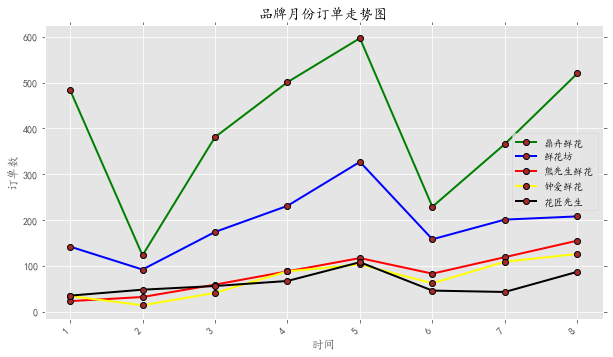

In [54]:
fig = plt.figure(figsize = (10,6))
# 绘图
color= ['green','blue','red','yellow','black']
for i in range(len(df_list)):
    
    plt.plot(df_list[i].time, # x轴数据
             df_list[i].订单数, # y轴数据
             linestyle = '-', # 折线类型
             linewidth = 2, # 折线宽度
             color = color[i], # 折线颜色
             marker = 'o', # 点的形状
             markersize = 6, # 点的大小
             markeredgecolor='black', # 点的边框色
             markerfacecolor='brown',# 点的填充色
             label = pinpai_ID_list[i]) # 添加标签

# 添加标题和坐标轴标签
plt.title('品牌月份订单走势图')
plt.xlabel('时间')
plt.ylabel('订单数')

# 剔除图框上边界和右边界的刻度
plt.tick_params(top = 'off', right = 'off')

# 为了避免x轴日期刻度标签的重叠，设置x轴刻度自动展现，并且45度倾斜
fig.autofmt_xdate(rotation = 45)
plt.legend()
# 显示图形
plt.show()